Importing Necessary  Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
df=pd.read_csv('Data2.csv',encoding='latin1')

In [3]:
#checking shape of dataset
df.shape

(108, 12)

Checking null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Welding speed(m/s)         108 non-null    float64
 1   Rotation speed(rps)        108 non-null    float64
 2   plate thickness(m)         108 non-null    float64
 3   Shoulder
radius(m)         108 non-null    float64
 4   Axial
pressure(Mpa)        108 non-null    float64
 5   Pin root
radius(m)         108 non-null    float64
 6   pin tip radius(m)          108 non-null    float64
 7   Tilt angle(degree)         108 non-null    float64
 8   Thermal
diffusivity(m2/s)  108 non-null    float64
 9   Yield
strength(Mpa)        108 non-null    int64  
 10  Tempearture                108 non-null    float64
 11  Result                     108 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 10.2 KB


In [5]:
df.head()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Tempearture,Result
0,0.000583,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,584.51,1
1,0.001170,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,576.89,1
2,0.002330,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,566.07,1
3,0.000583,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,639.03,1
4,0.001170,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,630.69,1


Void Present --> 1

In [6]:
voids=df[df.Result==1]
voids.shape

(43, 12)

 No Voids --> 0

In [7]:
No_voids=df[df.Result==0]
No_voids.shape

(65, 12)

Data visualization by Mean and Median

In [8]:
df.groupby('Result').mean()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Tempearture
Result,,,,,,,,,,,
0,0.002825,19.079077,0.006042,0.009588,15.685538,0.003287,0.002341,2.092308,0.000057,313.846154,693.414769
1,0.002594,12.398140,0.006127,0.009665,13.368372,0.003303,0.002362,2.081395,0.000055,317.767442,596.909070


In [9]:
df.groupby('Result').median()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Tempearture
Result,,,,,,,,,,,
0,0.00167,18.67,0.006,0.009,13.0,0.003,0.00270,2.0,0.00005,324.0,708.82
1,0.00160,13.33,0.004,0.009,13.0,0.003,0.00295,2.0,0.00005,324.0,615.60


Separating independent and dependent Variable

In [10]:
X=df.drop(['Result'],axis=1)
X.head()
X.shape

(108, 11)

In [11]:
Y=df['Result']
Y.head()
Y.shape

(108,)

In [12]:
# using train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [13]:
X_train.shape

(75, 11)

In [14]:
Y_train.shape

(75,)

### <span style='color:Black'> Now we are doing some Feature Selection with the help of Mutual info classifier and Pearson Corelation </span>

In [15]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(X_train,Y_train)
mutual_info

array([0.        , 0.23075826, 0.        , 0.        , 0.        ,
       0.        , 0.04388913, 0.03946167, 0.        , 0.00466802,
       0.17948072])

In [16]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Rotation speed(rps)           0.230758
Tempearture                   0.179481
pin tip radius(m)             0.043889
Tilt angle(degree)            0.039462
Yield\nstrength(Mpa)          0.004668
Welding speed(m/s)            0.000000
plate thickness(m)            0.000000
Shoulder\nradius(m)           0.000000
Axial\npressure(Mpa)          0.000000
Pin root\nradius(m)           0.000000
Thermal\ndiffusivity(m2/s)    0.000000
dtype: float64

<AxesSubplot: >

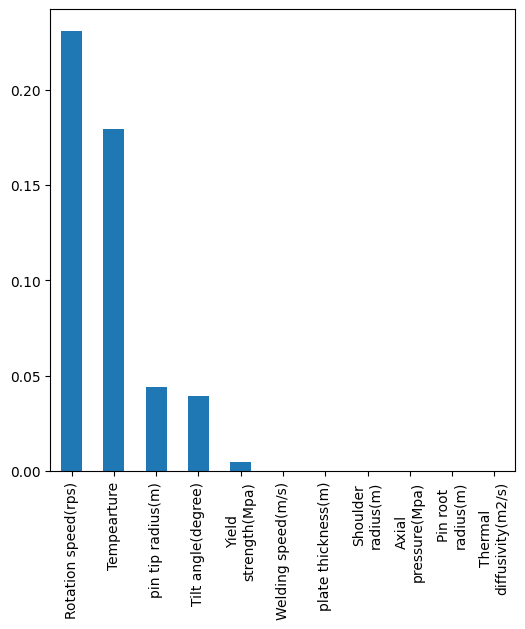

In [17]:
#lets plot the mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(6,6))

In [18]:
#Now we Will select the  top 4 important features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=4)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Rotation speed(rps)', 'Shoulder\nradius(m)',
       'Thermal\ndiffusivity(m2/s)', 'Tempearture'],
      dtype='object')

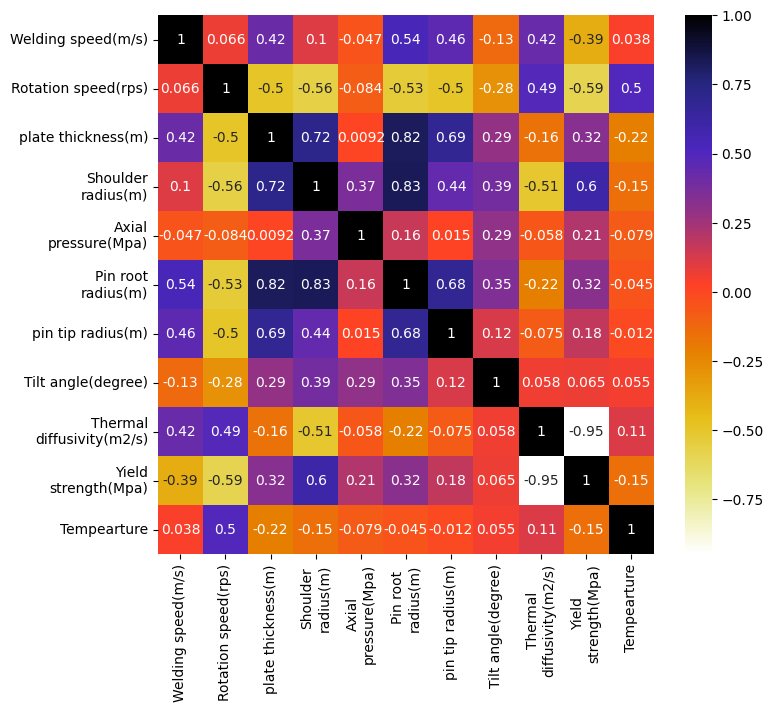

In [19]:
# using Pearson corelation
plt.figure(figsize=(8,7))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

3

In [22]:
corr_features

{'Pin root\nradius(m)', 'Shoulder\nradius(m)', 'pin tip radius(m)'}

In [23]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
X_train.head()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Axial\npressure(Mpa),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Tempearture
55,0.00200,18.34,0.0080,26.50,2.0,0.000049,352,720.14
100,0.00150,20.00,0.0021,23.59,2.5,0.000069,276,716.94
51,0.00150,15.00,0.0080,26.50,2.0,0.000049,352,634.05
70,0.00333,16.68,0.0040,13.00,2.0,0.000069,276,479.07
21,0.00167,20.00,0.0060,7.86,2.0,0.000050,324,656.54


Model Evaluations by various classification algos based on Feature selection

1. Evaluating by Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

C:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model_1.score(X_test,Y_test)

0.9090909090909091

In [26]:
#Confusion Matrix
Y_predicted=model_1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[21,  1],
       [ 2,  9]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

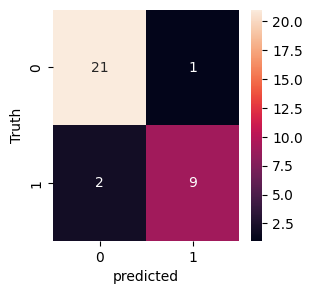

In [27]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

2.Evaluating by Decision Tree

In [28]:
from sklearn import tree
model_2=tree.DecisionTreeClassifier()
model_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
model_2.score(X_test,Y_test)

0.8787878787878788

In [30]:
#Confusion Matrix
Y_predicted=model_2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[21,  1],
       [ 3,  8]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

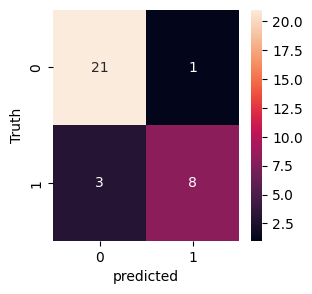

In [31]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train,Y_train)
model_3.score(X_test,Y_test)

0.9696969696969697

In [33]:
#Confusion Matrix
Y_predicted=model_3.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[22,  0],
       [ 1, 10]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

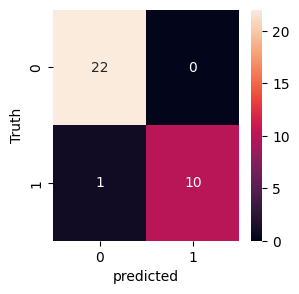

In [34]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Now we are making model based on Metallographic Parameters- some of the important metallographic params-Rotation speed,welding speed,Tilt angle,Axial pressure.

In [35]:
X2=df[['Rotation speed(rps)','Welding speed(m/s)','Tilt angle(degree)','Axial\npressure(Mpa)']]
X2.head()

,Rotation speed(rps),Welding speed(m/s),Tilt angle(degree),Axial\npressure(Mpa)
0,13.33,0.000583,2.0,13.0
1,13.33,0.001170,2.0,13.0
2,13.33,0.002330,2.0,13.0
3,16.67,0.000583,2.0,13.0
4,16.67,0.001170,2.0,13.0


In [36]:
from sklearn.model_selection import train_test_split #using train test split to avoid overfitting
X2_train, X2_test, Y2_train, Y2_test=train_test_split(X2,Y,test_size=0.3,random_state=20)

In [37]:
from sklearn.linear_model import LogisticRegression # Evaluating by logistic Regression
model_1=LogisticRegression()
model_1.fit(X2_train,Y2_train)
model_1.score(X2_test,Y2_test)

0.7575757575757576

In [38]:
#Confusion Matrix
Y_predicted=model_1.predict(X2_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y2_test,Y_predicted)
cm

array([[17,  5],
       [ 3,  8]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

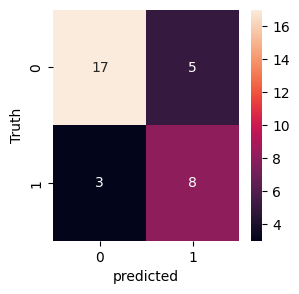

In [39]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [40]:
from sklearn import tree # Evaluating by Decision Tree
model_2=tree.DecisionTreeClassifier()
model_2.fit(X2_train,Y2_train)
model_2.score(X2_test,Y2_test)

0.8181818181818182

In [41]:
#Confusion Matrix
Y_predicted=model_2.predict(X2_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y2_test,Y_predicted)
cm

array([[19,  3],
       [ 3,  8]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

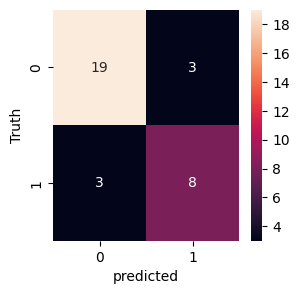

In [42]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [43]:
from sklearn.ensemble import RandomForestClassifier #Evaluating by Random Forest
model_3=RandomForestClassifier()
model_3.fit(X2_train,Y2_train)
model_3.score(X2_test,Y2_test)

0.8181818181818182

In [44]:
#Confusion Matrix
Y_predicted=model_3.predict(X2_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y2_test,Y_predicted)
cm

array([[18,  4],
       [ 2,  9]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

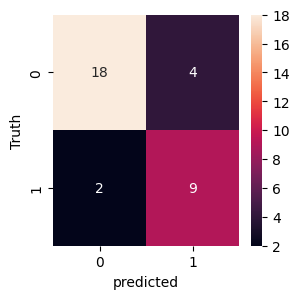

In [45]:
#visualization of confusion matrix by sns heatmap
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')